In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("../data/kic1718594_lc.txt")
times = data[:, 0] # days
dmmags = data[:, 1] * 1000. # mmags
dmmags_ivar = 1. / (0.2 ** 2) # made-up shit; inverse variance in inverse-squared mmags
metadata = np.loadtxt("../data/metadata.csv", delimiter=",", skiprows=1, usecols=np.arange(1, 37))

In [3]:
# model is amp * cos( 2 * pi * freq * t + phase)
freqs = metadata[::6] # cycles / day
amps = metadata[2::6] # mmag
phases = metadata[4::6] # radians
mask = np.ones_like(freqs).astype("bool")
# fourth mode sux
mask[3] = False
freqs = freqs[mask]
amps = amps[mask]
phases = phases[mask]

In [4]:
mean1 = np.zeros_like(dmmags)
for amp, freq, phase in zip(amps, freqs, phases):
    mean1 += amp * np.cos(2 * np.pi * freq * times + phase)
mean2 = np.zeros_like(dmmags)
for amp, freq, phase in zip(amps, freqs, phases):
    A = amp * np.cos(phase)
    B = -amp * np.sin(phase)
    mean2 += A * np.cos(2 * np.pi * freq * times) + B * np.sin(2 * np.pi * freq * times)

(55200, 55201)

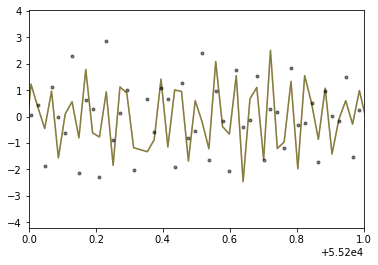

In [5]:
plt.plot(times, mean1, "r-", alpha=0.5)
plt.plot(times, mean2, "g-", alpha=0.5)
plt.plot(times, dmmags, "k.", alpha=0.5)
plt.xlim(55200, 55201)

In [6]:
As = amps * np.cos(phases)
Bs = -amps * np.sin(phases)

In [7]:
# function badly designed -- taking square roots!
def mean(parvec, times):
    K = len(parvec) / 3 # hack
    As = parvec[:K]
    Bs = parvec[K:2*K]
    omegas = 2 * np.pi * parvec[2*K:]
    mean = np.zeros_like(dmmags)
    for A, B, omega in zip(As, Bs, omegas):
        mean += A * np.cos(omega * times) + B * np.sin(omega * times)
    return mean
def chi(parvec, times, dmmags, dmmags_ivar):
    return (dmmags - mean(parvec, times)) * np.sqrt(dmmags_ivar)

In [8]:
parvec0 = np.hstack((As, Bs, freqs))
chi(parvec0, times, dmmags, dmmags_ivar)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


array([ 0.31914402,  4.11238981,  4.31175281, ...,  2.52837342,
       -8.10065654,  1.2824175 ])

In [9]:
from scipy import optimize as op

In [10]:
foo = op.leastsq(chi, parvec0, args=(times, dmmags, dmmags_ivar), full_output=True)
foo

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(array([ -1.37963982,   0.46444423,  -0.07124181,   0.35572303,
          0.15851417,   0.50598136,  -0.19781078,  -0.48536548,
         -0.18072311,   0.12525769,  18.3279728 ,  17.33748131,
         41.57359089,  19.77517193,  20.60163479]),
 array([[  3.80426947e-03,   3.53542470e-06,   6.81348369e-06,
          -7.66111603e-06,  -6.98815168e-06,   9.01159572e-03,
           7.48956627e-06,  -1.72984568e-06,  -1.32627786e-05,
           9.97503840e-06,  -1.90180097e-08,   4.70425713e-11,
           4.11137066e-11,  -1.09777081e-10,   1.72173844e-10],
        [  3.53542470e-06,   4.71729966e-03,   4.64537452e-06,
          -6.41388637e-06,  -3.69423242e-06,   8.18804409e-06,
           9.81622040e-03,  -1.22444619e-06,  -1.12590297e-05,
           5.11859714e-06,  -1.74181765e-11,   6.16358706e-08,
           2.79398328e-11,  -9.30303541e-11,   8.87854599e-11],
        [  6.81348369e-06,   4.64537452e-06,   2.35021773e-02,
           7.42910508e-06,   4.57328293e-06,   1.61493813e-05

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(55200, 55201)

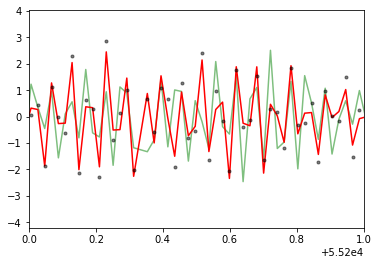

In [11]:
plt.plot(times, mean2, "g-", alpha=0.5)
plt.plot(times, mean(foo[0], times), "r-")
plt.plot(times, dmmags, "k.", alpha=0.5)
plt.xlim(55200, 55201)

In [12]:
parvec0

array([ -5.49146917e-01,  -2.81744716e-01,  -7.32053963e-03,
         2.16222318e-01,   1.52703478e-01,   1.36293925e+00,
        -4.18726535e-01,  -4.80544243e-01,  -3.35607661e-01,
        -1.32019345e-01,   1.83279727e+01,   1.73374812e+01,
         4.15735801e+01,   1.97751721e+01,   2.06016294e+01])